In [2]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
import numpy as np
# np.random.seed(42)
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
# from tslearn.clustering import TimeSeriesKMeans
# from tslearn.clustering import silhouette_score
# import tslearn

from dtaidistance import dtw
from dtaidistance import clustering
from itertools import combinations


<AxesSubplot: xlabel='Date'>

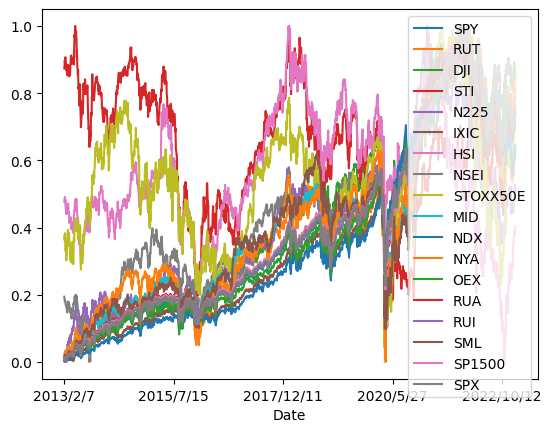

In [4]:
# import data
root = 'C:/Users/Allen/Desktop/IAQF/Data/'
data = pd.read_csv(root + 'merged_all_data.csv', index_col='Date', parse_dates=False)
data = (data-data.min())/(data.max()-data.min())
data.plot()

In [5]:
# Z-score normalization
scale = StandardScaler().fit(data)
df = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
df

,SPY,RUT,DJI,STI,N225,IXIC,HSI,NSEI,STOXX50E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
Date,,,,,,,,,,,,,,,,,,
2013/2/7,-1.409193,-1.574672,-1.490466,1.335267,-1.750582,-1.304601,-0.450252,-1.062111,-0.965901,-1.586034,-1.245092,-1.592914,-1.381441,-1.453597,-1.442982,-1.614722,-1.461465,-1.447876
2013/2/8,-1.401755,-1.559502,-1.482942,1.360636,-1.815148,-1.296359,-0.439588,-1.082419,-0.946878,-1.572005,-1.237440,-1.573825,-1.373194,-1.443201,-1.432909,-1.602027,-1.451323,-1.438051
2013/2/14,-1.397417,-1.532020,-1.485953,1.468303,-1.758554,-1.294985,-0.377715,-1.116915,-0.898705,-1.554593,-1.238528,-1.565622,-1.368531,-1.437844,-1.428843,-1.581256,-1.446023,-1.434082
2013/2/15,-1.399011,-1.533681,-1.484666,1.445207,-1.786281,-1.296886,-0.365886,-1.126573,-1.014064,-1.557564,-1.240308,-1.574755,-1.370912,-1.439505,-1.430515,-1.584586,-1.447959,-1.435911
2013/2/19,-1.388917,-1.509577,-1.476374,1.455233,-1.753659,-1.290703,-0.461490,-1.115366,-0.875086,-1.540239,-1.235518,-1.542015,-1.357928,-1.426479,-1.418171,-1.561651,-1.434606,-1.423084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/1/13,1.502512,1.091589,1.640674,0.713219,0.388242,0.965216,-0.954124,1.722009,1.285507,1.619350,1.070732,1.639007,1.310768,1.351126,1.363584,1.422599,1.429404,1.416429
2023/1/17,1.494730,1.084126,1.580422,0.689809,0.427761,0.969791,-1.006654,1.715113,1.314906,1.607858,1.074868,1.622991,1.302570,1.343931,1.356422,1.404367,1.419721,1.407087
2023/1/18,1.427780,1.002607,1.486006,0.720513,0.564314,0.930182,-0.981846,1.758767,1.280132,1.537930,1.036188,1.515134,1.232718,1.273508,1.286838,1.323615,1.347961,1.335632


In [6]:
X = df.T

# Method used: Time Series K-means Clustering with Dynamic Time Warping
# This part of code isn't useful
reference: https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3

In [6]:
n_clusters_range = [2, 3, 4, 5, 6, 7, 8]
sil = {}

for n_clusters in n_clusters_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters,verbose=True, metric="dtw")
    clusters = kmeans.fit_predict(X)   
   
    # Calculate the silhouette score for each clustering result
    silhouette_avg = tslearn.clustering.silhouette_score(X, clusters, metric="dtw")
    sil[silhouette_avg] = n_clusters

print("For n_clusters =", sil[max(sil)], "The average silhouette_score is :", max(sil))

NameError: name 'TimeSeriesKMeans' is not defined

Note: KMeans chooses centeriods randomly in the initialization. It's thus quite random every-run. This silhouette_score evaluation for N of clusters has yielded results ranging from 2-4.

In [7]:
# clusterize
kmeans = TimeSeriesKMeans(n_clusters=4 ,verbose=True, metric="dtw")
clusters = kmeans.fit_predict(X)

NameError: name 'TimeSeriesKMeans' is not defined

In [8]:
c = clusters.tolist()
c

NameError: name 'clusters' is not defined

In [9]:
# Visualize
clusters_dict = {0:[], 1:[], 2:[], 3:[]}

for i in range(12):
     clusters_dict[c[i]].append(X.index[i])

clusters_dict

NameError: name 'c' is not defined

In [10]:
for l in clusters_dict.values():
    df[l].plot()
    

TypeError: no numeric data to plot

# DTW Hierarchical Clustering
Reference: https://github.com/wannesm/dtaidistance


In [7]:
Y = np.matrix(X)
labels = list(X.index)

array([[16.        , 17.        ,  0.57566556,  2.        ],
       [13.        , 14.        ,  0.61814009,  2.        ],
       [18.        , 19.        ,  1.12103218,  4.        ],
       [12.        , 20.        ,  1.30944543,  5.        ],
       [ 5.        , 10.        ,  1.33298572,  2.        ],
       [ 0.        , 21.        ,  1.6131268 ,  6.        ],
       [ 9.        , 11.        ,  2.58684634,  2.        ],
       [ 1.        , 15.        ,  3.22846707,  2.        ],
       [ 2.        , 23.        ,  3.82830763,  7.        ],
       [24.        , 25.        ,  3.99059398,  4.        ],
       [22.        , 26.        ,  5.4189814 ,  9.        ],
       [27.        , 28.        ,  7.34818032, 13.        ],
       [ 7.        , 29.        ,  9.78224249, 14.        ],
       [ 4.        , 30.        , 16.34172843, 15.        ],
       [ 6.        ,  8.        , 18.70180156,  2.        ],
       [ 3.        , 32.        , 31.31829125,  3.        ],
       [31.        , 33.

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

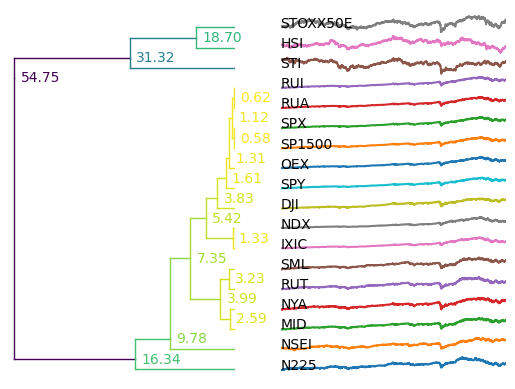

In [8]:
model = clustering.LinkageTree(dtw.distance_matrix_fast, {})
model.fit(Y)
model.plot(show_ts_label=lambda idx: labels[idx], show_tr_label=True, ts_label_margin=-10, ts_left_margin=10)

# DTW Pair Wise Scores

In [9]:
ds = dtw.distance_matrix_fast(Y)

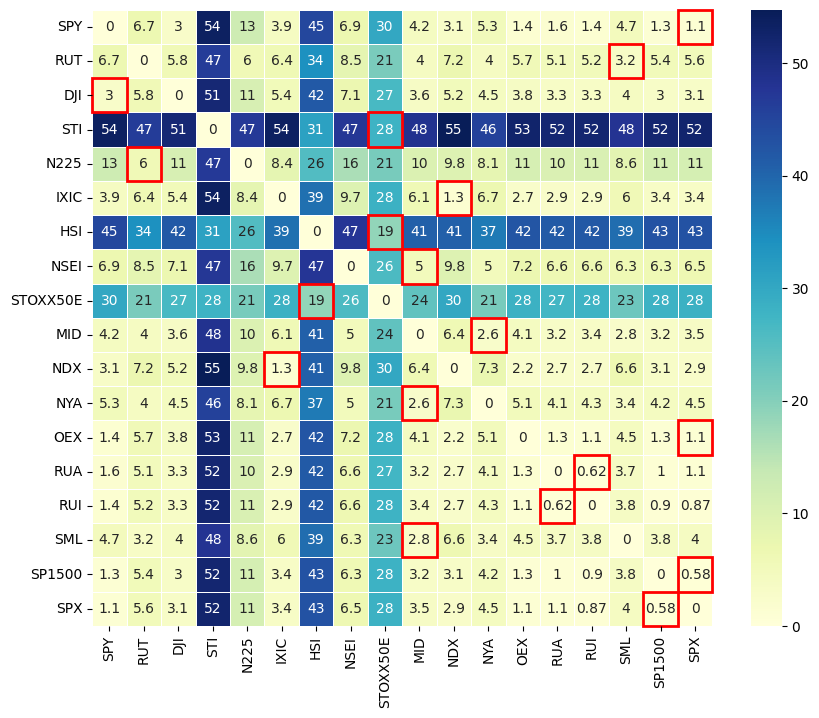

In [10]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax = sns.heatmap(ds, linewidth=0.5, cmap="YlGnBu", xticklabels=labels, yticklabels=labels, annot=True)

for ind, row in enumerate(ds):
    mds = np.ma.masked_equal(row, 0, copy=False)
    min_col = np.argmin(mds)
    max_col = np.argmax(mds)
    _ = ax.add_patch(plt.Rectangle((min_col, ind), 1, 1, fc='none', ec='red', lw=2, clip_on=False))
plt.show()


In [11]:
pairs = []
for comb in combinations(data.columns.values.tolist(), 2):
    pairs.append(comb)
pairs

[('SPY', 'RUT'),
 ('SPY', 'DJI'),
 ('SPY', 'STI'),
 ('SPY', 'N225'),
 ('SPY', 'IXIC'),
 ('SPY', 'HSI'),
 ('SPY', 'NSEI'),
 ('SPY', 'STOXX50E'),
 ('SPY', 'MID'),
 ('SPY', 'NDX'),
 ('SPY', 'NYA'),
 ('SPY', 'OEX'),
 ('SPY', 'RUA'),
 ('SPY', 'RUI'),
 ('SPY', 'SML'),
 ('SPY', 'SP1500'),
 ('SPY', 'SPX'),
 ('RUT', 'DJI'),
 ('RUT', 'STI'),
 ('RUT', 'N225'),
 ('RUT', 'IXIC'),
 ('RUT', 'HSI'),
 ('RUT', 'NSEI'),
 ('RUT', 'STOXX50E'),
 ('RUT', 'MID'),
 ('RUT', 'NDX'),
 ('RUT', 'NYA'),
 ('RUT', 'OEX'),
 ('RUT', 'RUA'),
 ('RUT', 'RUI'),
 ('RUT', 'SML'),
 ('RUT', 'SP1500'),
 ('RUT', 'SPX'),
 ('DJI', 'STI'),
 ('DJI', 'N225'),
 ('DJI', 'IXIC'),
 ('DJI', 'HSI'),
 ('DJI', 'NSEI'),
 ('DJI', 'STOXX50E'),
 ('DJI', 'MID'),
 ('DJI', 'NDX'),
 ('DJI', 'NYA'),
 ('DJI', 'OEX'),
 ('DJI', 'RUA'),
 ('DJI', 'RUI'),
 ('DJI', 'SML'),
 ('DJI', 'SP1500'),
 ('DJI', 'SPX'),
 ('STI', 'N225'),
 ('STI', 'IXIC'),
 ('STI', 'HSI'),
 ('STI', 'NSEI'),
 ('STI', 'STOXX50E'),
 ('STI', 'MID'),
 ('STI', 'NDX'),
 ('STI', 'NYA'),
 ('STI'

In [12]:
score = pd.DataFrame(ds, columns = labels)


In [13]:
score.index = labels

In [14]:
score.loc['RUT','SPY']

6.659267541439505

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y)
ax2.plot(x, -y)